<a href="https://colab.research.google.com/github/asangt/optimization_methods/blob/master/Sangadiev_HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aiusha Sangadiev, Homework 5

In [0]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

## Problem 1.

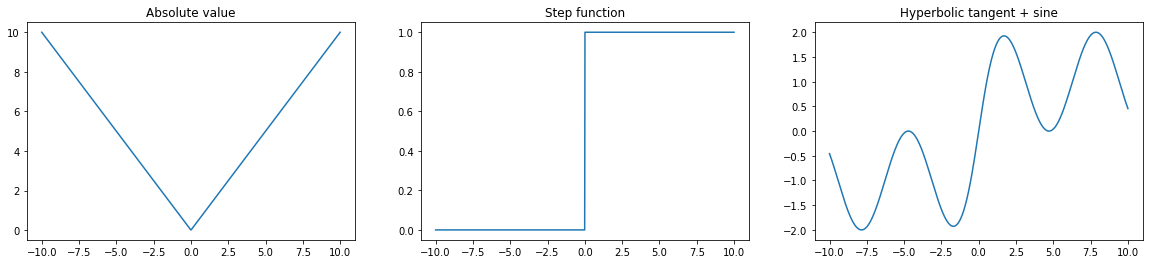

In [0]:
# Generate test signals

x = np.linspace(-10, 10, 1000)

# 1. Absolute value (piece-wise linear continuous)
f1 = np.piecewise(x, [x < 0, x >= 0], [lambda x: -x, lambda x: x])

# 2. Step function (piece-wise linear discontinuous)
f2 = np.piecewise(x, [x < 0, x > 0], [lambda x: 0, lambda x: 1])

# 3. Hyperbolic tangent + sine
f3 = np.tanh(x) + np.sin(x)

fig, axes = plt.subplots(1,3, figsize=(20,4))
for ax, f, name in zip(axes, [f1, f2, f3], ["Absolute value", "Step function", "Hyperbolic tangent + sine"]):
    ax.set_title(name)
    ax.plot(x, f)

plt.show()

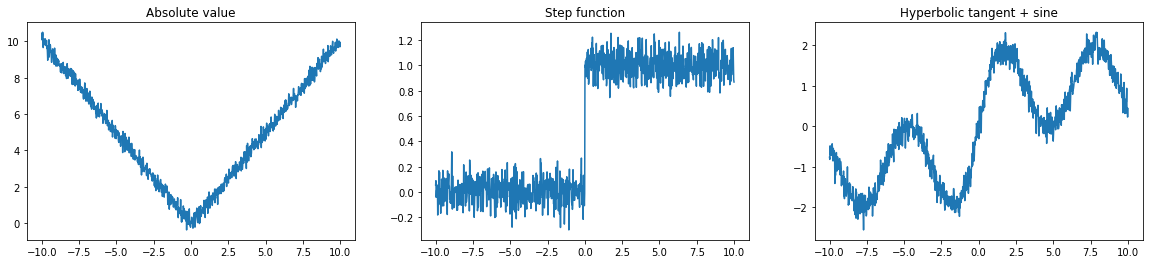

In [0]:
# Add Gaussian noise

np.random.seed(0)

f1_n = f1 + 0.25 * np.random.normal(size=len(x))
f2_n = f2 + 0.1 * np.random.normal(size=len(x))
f3_n = f3 + 0.2 * np.random.normal(size=len(x))

fig, axes = plt.subplots(1,3, figsize=(20,4))
for ax, f, name in zip(axes, [f1_n, f2_n, f3_n], ["Absolute value", "Step function", "Hyperbolic tangent + sine"]):
    ax.set_title(name)
    ax.plot(x, f)

plt.show()

In [0]:
# Signal recovery

# Introduce penalty matrices
D1 = np.zeros((len(x)-1, len(x)))
i,j = np.indices(D1.shape)
D1[i == j]   = 1.0
D1[i == j-1] = -1.0

D2 = np.zeros((len(x)-2, len(x)))
i,j = np.indices(D2.shape)
D2[i == j]   = 1.0
D2[i == j-1] = -2.0
D2[i == j-2] = 1.0

def recover_and_plot(f, f_n, name):
    obj_func = lambda fx: np.linalg.norm(f - fx)**2 + np.linalg.norm(D1 @ fx)
    f_rec_p1 = minimize(obj_func, f_n, method='L-BFGS-B')

    obj_func = lambda fx: np.linalg.norm(f - fx)**2 + np.linalg.norm(D1 @ fx, ord=1)
    f_rec_p2 = minimize(obj_func, f_n, method='L-BFGS-B')

    obj_func = lambda fx: np.linalg.norm(f - fx)**2 + np.linalg.norm(D2 @ fx, ord=1)
    f_rec_p3 = minimize(obj_func, f_n, method='L-BFGS-B')

    penalty_names = ["$||D_1 x||_2$", "$||D_1 x||_1$", "$||D_2 x||_1$"]
    fig, axes = plt.subplots(1,3, figsize=(20, 4))
    for ax, f_rec, pen_name in zip(axes, [f_rec_p1.x, f_rec_p2.x, f_rec_p3.x], penalty_names):
        ax.set_title(name + " recovery: " + pen_name)
        ax.plot(x, f_rec)

    for obj_val, pen_name in zip([f_rec_p1.fun, f_rec_p2.fun, f_rec_p3.fun], penalty_names):
        print(pen_name, "objective function value:", obj_val)
    plt.show()

$||D_1 x||_2$ objective function value: 0.6317949889817849
$||D_1 x||_1$ objective function value: 23.838580743033617
$||D_2 x||_1$ objective function value: 43.05817910522887


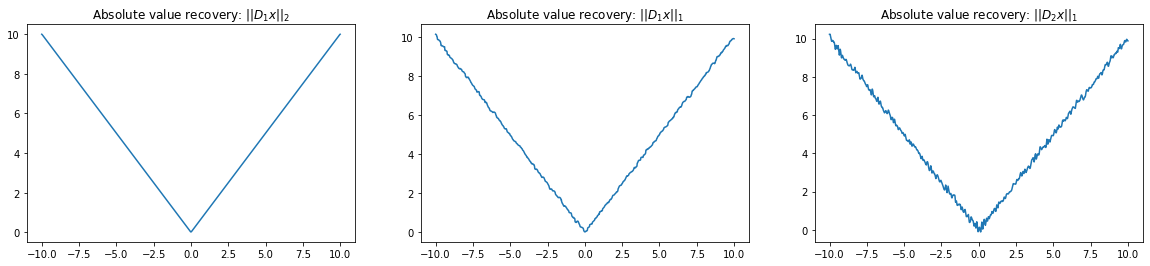

$||D_1 x||_2$ objective function value: 0.6967697711842569
$||D_1 x||_1$ objective function value: 9.287548787777023
$||D_2 x||_1$ objective function value: 18.054960082698596


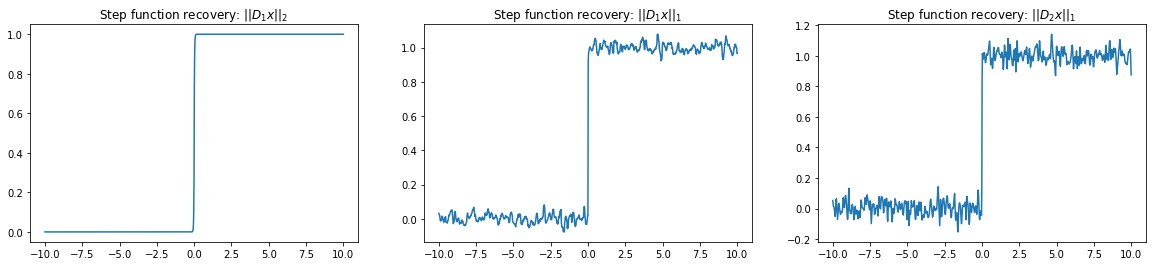

$||D_1 x||_2$ objective function value: 0.5387436184884963
$||D_1 x||_1$ objective function value: 19.84487011685686
$||D_2 x||_1$ objective function value: 35.46422306757627


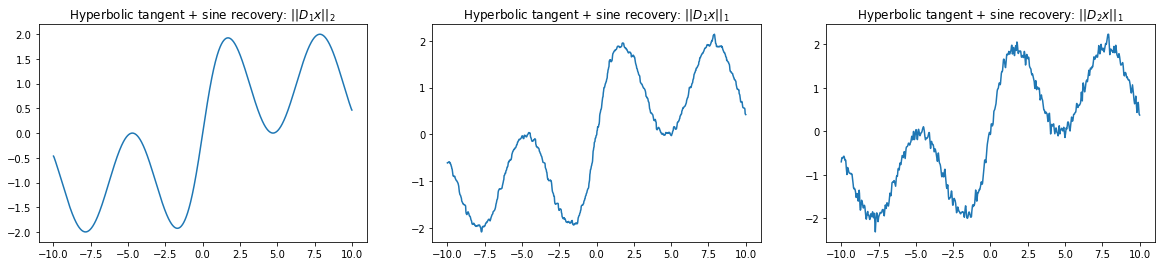

In [0]:
# 1. Absolute value reconstruction
recover_and_plot(f1, f1_n, "Absolute value")

# 2. Step function reconstruction
recover_and_plot(f2, f2_n, "Step function")

# 3. Hyperbolic tangent + sine reconstruction
recover_and_plot(f3, f3_n, "Hyperbolic tangent + sine")

In [0]:
# Dependency on regularizer weight gamma

def get_x(f, f_n, gammas):
    p1_vals, p2_vals, p3_vals = [], [], []
    for gamma in gammas:
        obj_func = lambda fx: np.linalg.norm(f - fx)**2 + gamma * np.linalg.norm(D1 @ fx)
        f_rec_p1 = minimize(obj_func, f_n, method='L-BFGS-B')
        p1_vals.append(f_rec_p1.x)

        obj_func = lambda fx: np.linalg.norm(f - fx)**2 + gamma * np.linalg.norm(D1 @ fx, ord=1)
        f_rec_p2 = minimize(obj_func, f_n, method='L-BFGS-B')
        p2_vals.append(f_rec_p2.x)

        obj_func = lambda fx: np.linalg.norm(f - fx)**2 + gamma * np.linalg.norm(D2 @ fx, ord=1)
        f_rec_p3 = minimize(obj_func, f_n, method='L-BFGS-B')
        p3_vals.append(f_rec_p3.x)

    return p1_vals, p2_vals, p3_vals

In [0]:
gammas = [0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 25.0, 50.0, 100.0]

In [0]:
f1_p1, f1_p2, f1_p3 = get_x(f1, f1_n, gammas)

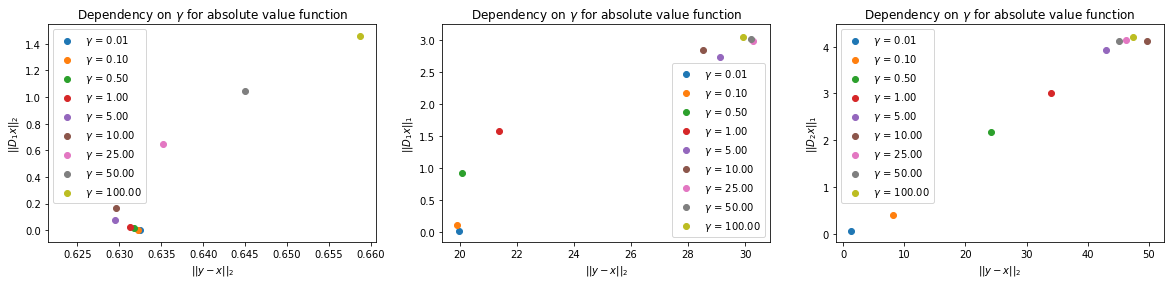

In [0]:
fig, axes = plt.subplots(1, 3, figsize=(20, 4))

names = ["$||D_1 x||_2$", "$||D_1 x||_1$", "$||D_2 x||_1$"]
for ax, name, f_p, order, D in zip(axes, names, [f1_p1, f1_p2, f1_p3], [2, 1, 1], [D1, D1, D2]):
    ax.set_title("Dependency on $\gamma$ for absolute value function")
    for i in np.arange(len(gammas)):
        ax.scatter(np.linalg.norm(D @ f_p[i], ord=order), np.linalg.norm(f1 - f_p[i]), label='$\gamma$ = %.2f'%gammas[i])
    ax.set_xlabel("$||y - x||_2$")
    ax.set_ylabel(name)
    ax.legend()
plt.show()

**Absolute value function:** \\
1) $||D_1 x||_2$ penalty - optimal $\gamma \approx 5$; \\
2) $||D_1 x||_1$ penalty - optimal $\gamma \approx 0.1$; \\
3) $||D_2 x||_1$ penalty - optimal $\gamma \approx 0.01$.

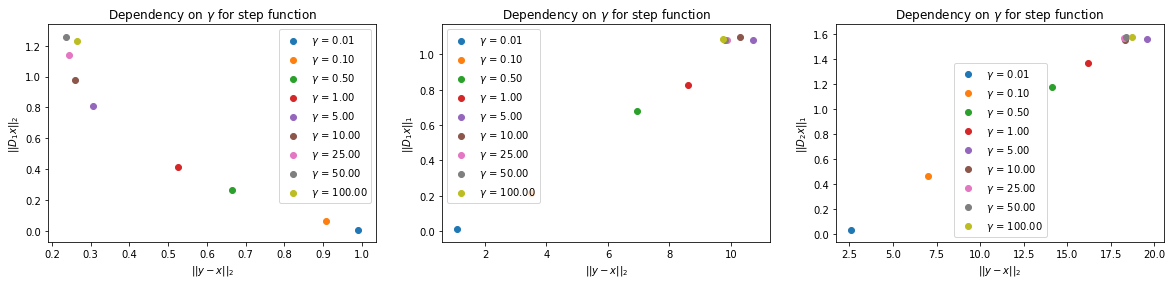

In [0]:
f2_p1, f2_p2, f2_p3 = get_x(f2, f2_n, gammas)

fig, axes = plt.subplots(1, 3, figsize=(20, 4))

names = ["$||D_1 x||_2$", "$||D_1 x||_1$", "$||D_2 x||_1$"]
for ax, name, f_p, order, D in zip(axes, names, [f2_p1, f2_p2, f2_p3], [2, 1, 1], [D1, D1, D2]):
    ax.set_title("Dependency on $\gamma$ for step function")
    for i in np.arange(len(gammas)):
        ax.scatter(np.linalg.norm(D @ f_p[i], ord=order), np.linalg.norm(f2 - f_p[i]), label='$\gamma$ = %.2f'%gammas[i])
    ax.set_xlabel("$||y - x||_2$")
    ax.set_ylabel(name)
    ax.legend()
plt.show()

**Step function:** \\
1) $||D_1 x||_2$ penalty - optimal $\gamma \approx 50$; \\
2) $||D_1 x||_1$ penalty - optimal $\gamma \approx 0.01$; \\
3) $||D_2 x||_1$ penalty - optimal $\gamma \approx 0.01$.

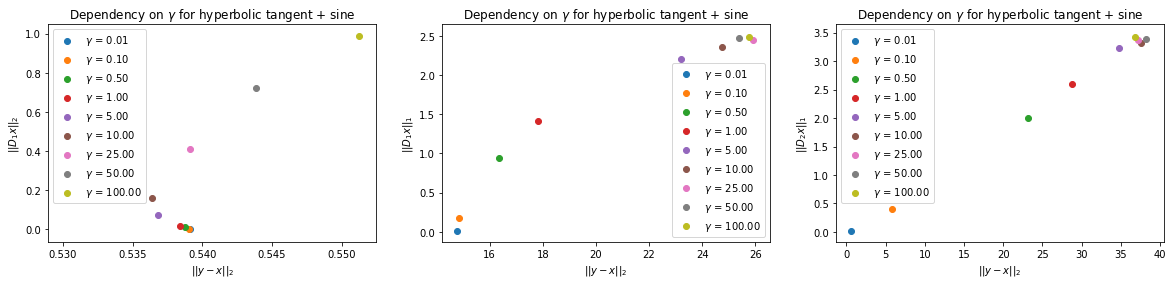

In [0]:
f3_p1, f3_p2, f3_p3 = get_x(f3, f3_n, gammas)

fig, axes = plt.subplots(1, 3, figsize=(20, 4))

names = ["$||D_1 x||_2$", "$||D_1 x||_1$", "$||D_2 x||_1$"]
for ax, name, f_p, order, D in zip(axes, names, [f3_p1, f3_p2, f3_p3], [2, 1, 1], [D1, D1, D2]):
    ax.set_title("Dependency on $\gamma$ for hyperbolic tangent + sine")
    for i in np.arange(len(gammas)):
        ax.scatter(np.linalg.norm(D @ f_p[i], ord=order), np.linalg.norm(f3 - f_p[i]), label='$\gamma$ = %.2f'%gammas[i])
    ax.set_xlabel("$||y - x||_2$")
    ax.set_ylabel(name)
    ax.legend()
plt.show()

**Hyperbolic tangent + sine:** \\
1) $||D_1 x||_2$ penalty - optimal $\gamma \approx 10$; \\
2) $||D_1 x||_1$ penalty - optimal $\gamma \approx 0.01$; \\
3) $||D_2 x||_1$ penalty - optimal $\gamma \approx 0.01$.

## Problem 2.

Notice that
$$ \mathcal{E} = \{ x : (x-c)^{\top} P^{-1} (x-c) \leq 1 \} $$
can be rewritten as
$$ \mathcal{E} = \{ x : 1 - (x-c)^{\top} P^{-1} (x-c) \geq 0 \} $$
Now we can utilize Schur complement and rewrite this as a linear matrix inequality:
$$ \mathcal{E} = 
\begin{pmatrix}
1 & (x-c)^{\top} \\
(x-c) & P
\end{pmatrix} \succeq 0. $$
Now, we can write this w.r.t. to $ a \in \mathcal{E} $:
$$ \mathcal{E} = 
\begin{pmatrix}
1 & (a-c)^{\top} \\
(a-c) & P
\end{pmatrix} \succeq 0. $$

## Problem 3.

In [0]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pandas as pd
import random
import cvxpy as cp
import scipy as sp

In [0]:
!pip install python-igraph
from igraph import Graph

     |████████████████████████████████| 3.2MB 2.7MB/s 


In [0]:
# Generate a graph and construct Laplacian
random.seed(0)

G = Graph.Erdos_Renyi(n=20, m=160)  # generate random graph
L = np.array(G.laplacian())
print(L.shape, np.count_nonzero(L)) # 85% non-zero elements

(20, 20) 340


In [0]:
# 1. NAIVE RANDOMIZATION
np.random.seed(0)

samples = np.random.choice([-1, 1], size=(1000, 20))
nr_values = []
for x in samples:
    x = x.reshape(-1, 1)
    nr_values.append((x.T @ L @ x)[0][0])

In [0]:
# 2. Solution of SDP relaxation
X = cp.Variable((20, 20), PSD=True)
constraints = [ X[i, i] == 1.0 for i in np.arange(20) ]
prob = cp.Problem(cp.Maximize(cp.trace(L @ X)), constraints)
prob.solve()

sdp_values = [prob.value] * 1000

In [0]:
# 3. Goemans-Williamson relaxation
print("Eigen values:")
print(np.linalg.eigvals(X.value))

# Because of numerical truncation errors, some eigenvalues are negative but very small (order of -1e-5),
# we solve this problem by adding a very small identity matrix

V = sp.linalg.cholesky(X.value + 7.1 * 1e-5 * np.eye(20, 20))

np.random.seed(0)
noise = np.random.normal(size=(1000, 20))

gw_values = []
for j in np.arange(1000):
    eps = noise[j] / np.linalg.norm(noise[j])
    v_eps = np.array([V[:, i].reshape(-1,1).T @ eps for i in np.arange(20)])
    x = np.piecewise(v_eps, condlist=[v_eps > 0, v_eps < 0], funclist=[lambda v_eps: 1, lambda v_eps: -1])
    gw_values.append((x.reshape(-1,1).T @ L @ x)[0][0])

Eigen values:
[ 1.51785929e+01  3.19470044e+00  1.62702331e+00 -7.00412689e-05
  4.00895539e-05 -5.01159533e-05 -4.76113666e-05  2.94964891e-05
 -3.34860218e-05  1.75227409e-05 -2.53029942e-05 -2.04928036e-05
 -1.85040539e-05 -1.35179372e-05 -1.00262863e-05  9.09982377e-06
  6.64310166e-06  1.70406928e-07  1.51244826e-06  4.06227402e-06]


In [0]:
# 4. Mathematical expectation
m_exp = [np.mean(gw_values)] * 1000

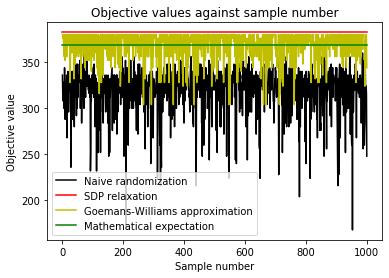

In [0]:
# Plot on one graph
xaxis_samples = np.linspace(1, 1000, 1000)
plt.plot(xaxis_samples, nr_values, c='black', label='Naive randomization')
plt.plot(xaxis_samples, sdp_values, c='red', label='SDP relaxation')
plt.plot(xaxis_samples, gw_values, c='y', label='Goemans-Williams approximation')
plt.plot(xaxis_samples, m_exp, c='green', label='Mathematical expectation')
plt.xlabel('Sample number')
plt.ylabel('Objective value')
plt.title('Objective values against sample number')
plt.legend()
plt.show()

## Problem 4.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

### Linear program formulation
Denote $x_{ij}$ - number of tonnes of $i$-th cargo type in $j$-th compartment (non-negative reals), $p_i$ - profit of $i$-th type of cargo. Then, the problem can be stated in the following way:
$$ \underset{x_{ij} \in \mathbb{R}^+}{\max} \sum\limits_{i=1}^4 p_i \sum\limits_{j=1}^3 x_{ij}. $$
Constraints: \\
1) Denote $w$ - vector of available cargo weights, where $w_i$ - is the available weight for the $i$-th cargo. **The following four constraints must be satisfied** - we cannot take more cargo of type $i$ than there is available:
$$ \sum\limits_{j=1}^3 x_{ij} \leq w_i, \space i \in \{ 1, 2, 3, 4 \}. $$
2) Denote $W$ - vector of compartment weight capacities, where $W_j$ - is the weight capacity of $j$-th compartment. **The following three constraints must be satisfied** - we cannot fill the compartments more than their weight capacities:
$$ \sum\limits_{i=1}^4 x_{ij} \leq W_j, \space j \in \{ 1, 2, 3 \}. $$
3) Denote $V$ - vector of compartment volume capacities, where $V_j$ - is the volume capacity of $j$-th compartment; $v$ - vector of cargo volumes (in cubic metres per tonne), $v_i$ - volume of $i$-th cargo. **The following three constraints must be satisfied** - we cannot fill the compartments more than their volume capacities:
$$ \sum\limits_{i=1}^4 v_i x_{ij} \leq V_j, \space j \in \{ 1, 2, 3 \}. $$
4) Finally, **we have to satisfy the following constraint** - the weight of the cargo in the respective compartments must be the same proportion of that compartment's weight capacity to maintain the balance of the plane:
$$ \frac{1}{W_1} \sum\limits_{i=1}^4 x_{i1} = \frac{1}{W_2} \sum\limits_{i=1}^4 x_{i2} = \frac{1}{W_3} \sum\limits_{i=1}^4 x_{i3}. $$
This constraint can also be rewritten in a more convenient form **through three following constraints**:
$$ \frac{1}{W_j} \sum\limits_{i=1}^4 x_{ij} = \frac{1}{W_k} \sum\limits_{i=1}^4 x_{ik}, \space (j \neq k) \in \{ 1, 2, 3 \}. $$ \\

**This program was formulated under following assumptions**: \\
1) all the provided figures are correct; \\
2) each cargo can be split in any proportions; \\
3) each cargo can be split into several compartments (e.g. one cargo type in all three compartments); \\
4) shapes of cargoes allows them to fill all the volume - e.g. ball-shaped cargo would have free space in between them, while rectangular-shaped cargo can be packed tightly.

In [0]:
# Solve the linear program in cvxpy.

p = np.array([310, 380, 350, 285], dtype=float) # vector of profits
w = np.array([18, 15, 23, 12], dtype=float) # vector of available weights for cargoes
W = np.array([10, 16, 8], dtype=float) # vector of weight capacities of compartments
v = np.array([480, 650, 580, 390], dtype=float) # vector of cargo volumes per tonne
V = np.array([6800, 8700, 5300], dtype=float) # vector of volume capacities of compartments

x = cp.Variable((4, 3)) # matrix of cargo weights in compartments
constraints  = [np.sum([x[i,j] for j in np.arange(3)]) <= w[i] for i in np.arange(4)] # first constraint
constraints += [np.sum([x[i,j] for i in np.arange(4)]) <= W[j] for j in np.arange(3)] # second constraint
constraints += [np.sum([v[i] * x[i,j] for i in np.arange(4)]) <= V[j] for j in np.arange(3)] # third constraint
constraints += [1 / W[j] * np.sum([x[i,j] for i in np.arange(4)]) ==\
                1 / W[k] * np.sum([x[i,k] for i in np.arange(4)]) for j in np.arange(3) for k in np.arange(3) if j != k] # fourth constraint
constraints += [x[i,j] >= 0 for i in np.arange(4) for j in np.arange(3)] # x_{ij} must be non-negative reals
problem = cp.Problem(cp.Maximize(np.sum([p[i] * np.sum([x[i,j] for j in np.arange(3)]) for i in np.arange(4)])),\
                     constraints=constraints)
problem.solve(solver=cp.GLPK)

print("Maximum profit:", problem.value)
print("Optimal weights:")
print(x.value)

Maximum profit: 12151.57894736842
Optimal weights:
[[ 0.          0.          0.        ]
 [ 7.          0.          8.        ]
 [ 3.         12.94736842  0.        ]
 [ 0.          3.05263158  0.        ]]


In [0]:
# Increase available cargo weights by 10%

w = 1.1 * np.array([18, 15, 23, 12], dtype=float) # vector of available weights for cargoes

x = cp.Variable((4, 3)) # matrix of cargo weights in compartments
constraints  = [np.sum([x[i,j] for j in np.arange(3)]) <= w[i] for i in np.arange(4)] # first constraint
constraints += [np.sum([x[i,j] for i in np.arange(4)]) <= W[j] for j in np.arange(3)] # second constraint
constraints += [np.sum([v[i] * x[i,j] for i in np.arange(4)]) <= V[j] for j in np.arange(3)] # third constraint
constraints += [1 / W[j] * np.sum([x[i,j] for i in np.arange(4)]) ==\
                1 / W[k] * np.sum([x[i,k] for i in np.arange(4)]) for j in np.arange(3) for k in np.arange(3) if j != k] # fourth constraint
constraints += [x[i,j] >= 0 for i in np.arange(4) for j in np.arange(3)] # x_{ij} must be non-negative reals
problem = cp.Problem(cp.Maximize(np.sum([p[i] * np.sum([x[i,j] for j in np.arange(3)]) for i in np.arange(4)])),\
                     constraints=constraints)
problem.solve(solver=cp.GLPK)

print("Maximum profit:", problem.value)
print("Optimal weights:")
print(x.value)

Maximum profit: 12196.578947368422
Optimal weights:
[[ 0.          0.          0.        ]
 [ 8.5         0.          8.        ]
 [ 1.5        12.94736842  0.        ]
 [ 0.          3.05263158  0.        ]]


In [0]:
# Decrease available cargo weights by 10% 

w = 0.9 * np.array([18, 15, 23, 12], dtype=float) # vector of available weights for cargoes

x = cp.Variable((4, 3)) # matrix of cargo weights in compartments
constraints  = [np.sum([x[i,j] for j in np.arange(3)]) <= w[i] for i in np.arange(4)] # first constraint
constraints += [np.sum([x[i,j] for i in np.arange(4)]) <= W[j] for j in np.arange(3)] # second constraint
constraints += [np.sum([v[i] * x[i,j] for i in np.arange(4)]) <= V[j] for j in np.arange(3)] # third constraint
constraints += [1 / W[j] * np.sum([x[i,j] for i in np.arange(4)]) ==\
                1 / W[k] * np.sum([x[i,k] for i in np.arange(4)]) for j in np.arange(3) for k in np.arange(3) if j != k] # fourth constraint
constraints += [x[i,j] >= 0 for i in np.arange(4) for j in np.arange(3)] # x_{ij} must be non-negative reals
problem = cp.Problem(cp.Maximize(np.sum([p[i] * np.sum([x[i,j] for j in np.arange(3)]) for i in np.arange(4)])),\
                     constraints=constraints)
problem.solve(solver=cp.GLPK)

print("Maximum profit:", problem.value)
print("Optimal weights:")
print(x.value)

Maximum profit: 12106.57894736842
Optimal weights:
[[ 0.          0.          0.        ]
 [ 5.5         0.          8.        ]
 [ 4.5        12.94736842  0.        ]
 [ 0.          3.05263158  0.        ]]


Increasing or decreasing available cargo weights by 10% does not seem to affect the result profit value much: \\
1) Increasing cargo weights by 10%, resulted in profits rising by ~0.004%, which insignificant; \\
2) Decreasing cargo weights by 10%, resulted in profits dropping by the same margin. \\
This means that the problem is not sensitive to constraint values. \\

As can be seen from the weight changes above, profit is influenced by the cargoes $C2$ and $C3$. This can be explained by the fact that these two cargo types have the highest profit values. The other two types are not affected by the weight changes. Moreover, cargo of the first type is not used at all as it has low profit and loses in terms of volume to the fourth cargo type. \\

Dual variables are profits and availability of resources. As it was said above, higher profit cargo has higher priority unless when the difference in profits is small, but the more profitable one is significantly more voluminous (like the case of 1st and 4th cargo types). Increase of resource availability leads to increase in overall profit and decrease - to decrease, that's stems from the fact that increasing \ decreasing availability lets us use more or less of the profitable resources. However, as it was shown above, the overall influence is not as significant.